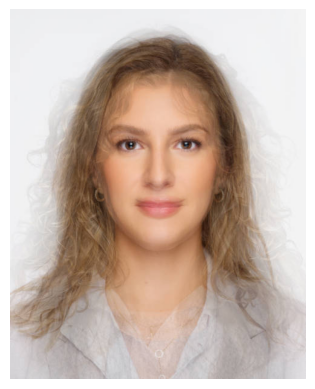

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The image is classified as: FAKE


In [19]:
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.inception_v3 import preprocess_input

# Load the trained discriminator model
discriminator_model = load_model('FINAL_discriminator_model.h5')

def classify_image(image_path, discriminator_model):
    # Load and preprocess the input image
    img = load_img(image_path, target_size=(64, 64))
    img_array = img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)

    # Predict using the discriminator model
    prediction = discriminator_model.predict(img_array)

    # Interpret the prediction result
    if prediction[0][0] > 0.5:
        result = "REAL"
    else:
        result = "FAKE"

    return result

# Path to the image you want to classify
image_path = r'C:\Users\heena\Downloads\python\NNDLandMLOAprj\DCGAN-Photorealistic-Face-Generator-master\DCGAN-Photorealistic-Face-Generator-master\test_images_fake\test_image_fake.jpg'

import matplotlib.pyplot as plt
from PIL import Image

# Open the image using PIL (Python Imaging Library)
img = Image.open(image_path)

# Display the image using Matplotlib
plt.imshow(img)
plt.axis('off')  # Hide axis
plt.show()

# Classify the input image
classification_result = classify_image(image_path, discriminator_model)
print("The image is classified as:", classification_result)


In [42]:
import os
import glob
import numpy as np
from keras.models import load_model
from sklearn.metrics import accuracy_score
from PIL import Image

# Rest of your code...


# Load the final discriminator model
final_discriminator_model = load_model('FINAL_discriminator_model.h5')

# Define a function to load and preprocess test images
def load_and_preprocess_test_images(image_path, target_size=(64, 64)):
    img = Image.open(image_path)
    img = img.crop((0, 20, 178, 198))
    img = img.resize(target_size)
    img = np.array(img)/127.5 - 1
    return img

# Load and preprocess real test images
real_test_dir = r"C:\Users\heena\Downloads\python\NNDLandMLOAprj\DCGAN-Photorealistic-Face-Generator-master\DCGAN-Photorealistic-Face-Generator-master\test_images_real"
real_test_image_paths = glob.glob(os.path.join(real_test_dir, '*.jpg'))
real_test_images = np.array([load_and_preprocess_test_images(img_path) for img_path in real_test_image_paths])

# Generate predictions for real test images
real_test_predictions = final_discriminator_model.predict(real_test_images)

# Define a threshold to classify predictions as real or fake
threshold = 0.5
real_test_labels = np.ones(len(real_test_predictions))  # Assuming all real images have label 1
real_test_predicted_labels = (real_test_predictions > threshold).astype(int)

# Load and preprocess fake test images
fake_test_dir = r"C:\Users\heena\Downloads\python\NNDLandMLOAprj\DCGAN-Photorealistic-Face-Generator-master\DCGAN-Photorealistic-Face-Generator-master\test_images_fake"
fake_test_image_paths = glob.glob(os.path.join(fake_test_dir, '*.jpg'))
fake_test_images = np.array([load_and_preprocess_test_images(img_path) for img_path in fake_test_image_paths])

# Generate predictions for fake test images
fake_test_predictions = final_discriminator_model.predict(fake_test_images)

# Define a threshold to classify predictions as real or fake
fake_test_labels = np.zeros(len(fake_test_predictions))  # Assuming all fake images have label 0
fake_test_predicted_labels = (fake_test_predictions <= threshold).astype(int)

# Combine real and fake test data and predictions
test_images = np.concatenate((real_test_images, fake_test_images), axis=0)
test_labels = np.concatenate((real_test_labels, fake_test_labels), axis=0)
test_predicted_labels = np.concatenate((real_test_predicted_labels, fake_test_predicted_labels), axis=0)

# Calculate accuracy score
accuracy = accuracy_score(test_labels, test_predicted_labels)

print("Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Accuracy: 0.5
